In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

In [2]:
file_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\cleaned_cardio_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Recreate Week 2 feature engineering
df['bp_category'] = pd.cut(df['ap_hi'], bins=[0, 120, 130, 140, float('inf')], 
                          labels=['Normal', 'Elevated', 'High Stage 1', 'High Stage 2'], right=False)
df['bp_interaction'] = df['ap_hi'] * df['ap_lo']
df = pd.get_dummies(df, columns=['age_group', 'bp_category'], drop_first=True)
X = df.drop(columns=['id', 'age', 'cardio'])
y = df['cardio']
scaler = StandardScaler()
numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'bp_interaction']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Recreate Week 2 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Load the baseline model from Week 2
model_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\logistic_regression_baseline.pkl"
model = joblib.load(model_path)

Feature Importance (Top 10):
                     Feature  Coefficient  Abs_Coefficient
18  bp_category_High Stage 2     1.647155         1.647155
17  bp_category_High Stage 1     0.716348         0.716348
3                      ap_hi     0.485990         0.485990
5                cholesterol     0.479493         0.479493
12            bp_interaction    -0.423749         0.423749
4                      ap_lo     0.307320         0.307320
13     age_group_Middle-aged    -0.291059         0.291059
10                 age_years     0.271229         0.271229
9                     active    -0.232067         0.232067
8                       alco    -0.221807         0.221807


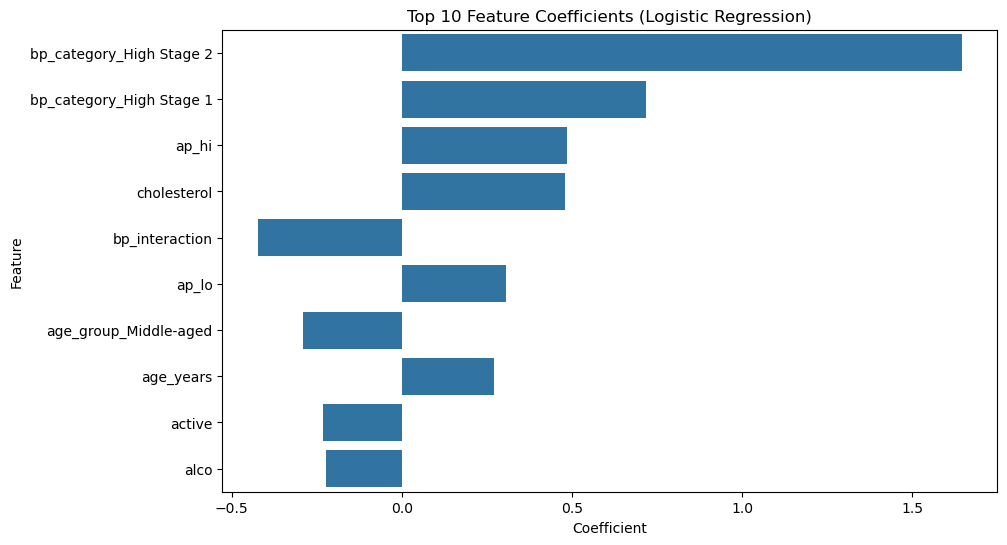

In [4]:
feature_names = X.columns
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(coefficients)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature importance
print("Feature Importance (Top 10):")
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Feature Coefficients (Logistic Regression)")
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Advanced Model (Random Forest)
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest - Training Accuracy:", round(train_accuracy_rf, 4))
print("Random Forest - Testing Accuracy:", round(test_accuracy_rf, 4))
print("\nRandom Forest - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Training Accuracy: 0.9783
Random Forest - Testing Accuracy: 0.7051

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6471
           1       0.71      0.70      0.70      6430

    accuracy                           0.71     12901
   macro avg       0.71      0.71      0.71     12901
weighted avg       0.71      0.71      0.71     12901




Random Forest - Feature Importance (Top 10):
                     Feature  Importance
11                       bmi    0.194790
2                     weight    0.146925
1                     height    0.140764
10                 age_years    0.131225
12            bp_interaction    0.084989
3                      ap_hi    0.072948
18  bp_category_High Stage 2    0.041866
5                cholesterol    0.040105
4                      ap_lo    0.038305
0                     gender    0.019741


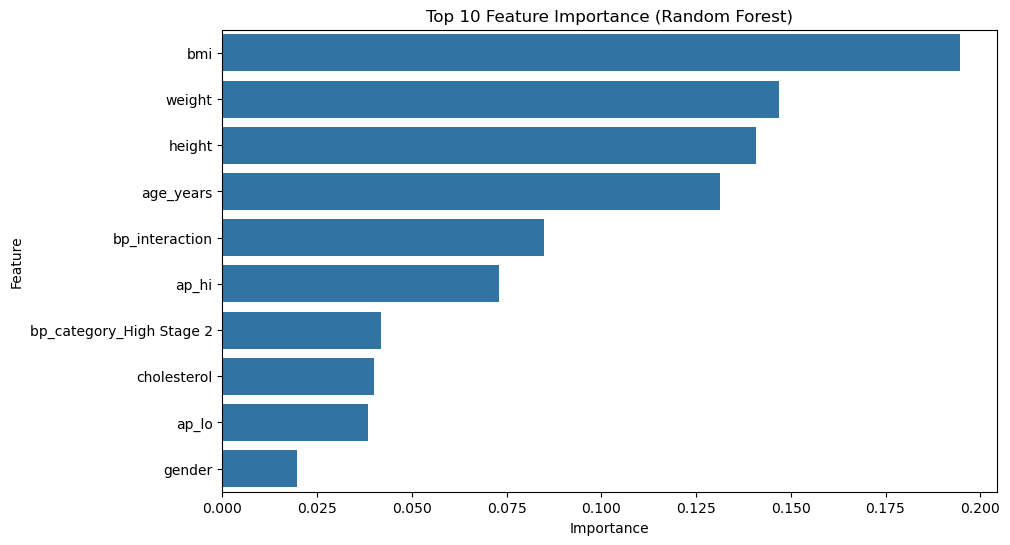

In [6]:
rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
print("\nRandom Forest - Feature Importance (Top 10):")
print(rf_importance.head(10))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10))
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

# 3. Hyperparameter Tuning
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", round(grid_search.best_score_, 4))

# Evaluate best model on test set
best_rf_model = grid_search.best_estimator_
y_test_pred_tuned = best_rf_model.predict(X_test)
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
print("Tuned Random Forest - Testing Accuracy:", round(test_accuracy_tuned, 4))
print("\nTuned Random Forest - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_tuned))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7291
Tuned Random Forest - Testing Accuracy: 0.7348

Tuned Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6471
           1       0.76      0.68      0.72      6430

    accuracy                           0.73     12901
   macro avg       0.74      0.73      0.73     12901
weighted avg       0.74      0.73      0.73     12901



Tuned Random Forest - ROC-AUC Score (Test Set): 0.8008

Tuned Random Forest - Confusion Matrix (Test Set):
[[5080 1391]
 [2030 4400]]


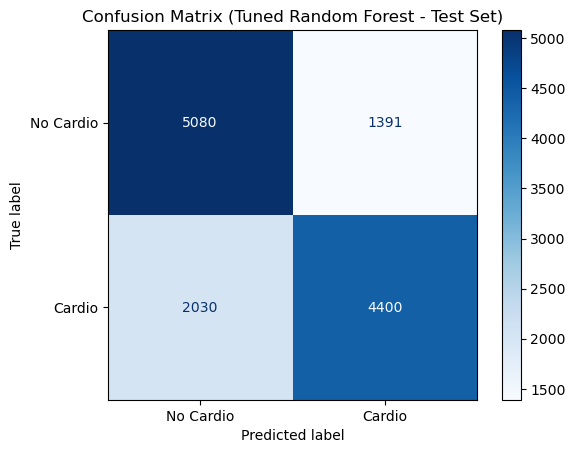

In [8]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 4. Evaluation
# Calculate ROC-AUC
y_test_prob_tuned = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_test_prob_tuned)

cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)

print("Tuned Random Forest - ROC-AUC Score (Test Set):", round(roc_auc_tuned, 4))
print("\nTuned Random Forest - Confusion Matrix (Test Set):")
print(cm_tuned)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No Cardio', 'Cardio'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Tuned Random Forest - Test Set)")
plt.show()

In [9]:
import joblib

# 5. Deliverable
# Save the tuned model
tuned_model_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\tuned_random_forest_model.pkl"
joblib.dump(best_rf_model, tuned_model_path)
print("Tuned Random Forest model saved as:", tuned_model_path)

# Document results
print("\nWeek 3 Summary:")
print("- Best Parameters:", grid_search.best_params_)
print("- Best Cross-Validation Score:", round(grid_search.best_score_, 4))
print("- Tuned Random Forest - Testing Accuracy:", round(test_accuracy_tuned, 4))
print("- Tuned Random Forest - ROC-AUC Score (Test Set):", round(roc_auc_tuned, 4))
print("- Tuned Random Forest - Confusion Matrix (Test Set):")
print(cm_tuned)
print("\nKey Insights:")
print("- Tuned Random Forest improves accuracy to 73.5% (from 72.9% baseline) and ROC-AUC to 0.8008.")
print("- Key features include bmi, weight, and height, with BP metrics still relevant.")
print("- Recall for cardio (0.68) remains lower than for no-cardio (0.79), suggesting focus on reducing false negatives.")

Tuned Random Forest model saved as: C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\tuned_random_forest_model.pkl

Week 3 Summary:
- Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
- Best Cross-Validation Score: 0.7291
- Tuned Random Forest - Testing Accuracy: 0.7348
- Tuned Random Forest - ROC-AUC Score (Test Set): 0.8008
- Tuned Random Forest - Confusion Matrix (Test Set):
[[5080 1391]
 [2030 4400]]

Key Insights:
- Tuned Random Forest improves accuracy to 73.5% (from 72.9% baseline) and ROC-AUC to 0.8008.
- Key features include bmi, weight, and height, with BP metrics still relevant.
- Recall for cardio (0.68) remains lower than for no-cardio (0.79), suggesting focus on reducing false negatives.
